## load functions

In [1]:
import numpy as np
import pandas as pd
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
# import our modules
from utils import vis_tsne, plot_elbow, vis_umap, d3_tsne, new_d3_umap, d3_umap

def run_kmeans(X, cluster_num, init='random', n_init=10, max_iter=300,tol=1e-4,random_state=40):
    km = KMeans(
            n_clusters=cluster_num, init=init,
            n_init=n_init, max_iter=max_iter, 
            tol=tol, random_state=random_state
        )
    y_km = km.fit_predict(X)
    return km, y_km

def search_k_means_cluster(X, min_num, max_num):
    distortions = []
    silhouette_score_list = []
    for i in range(min_num,max_num):
        km, y_km = run_kmeans(X, i)
        distortions.append(km.inertia_)
        tmp_score = silhouette_score(X, y_km)
        silhouette_score_list.append(tmp_score)
        print("For n_clusters = {}, silhouette score is {}".format(i, tmp_score))
    return distortions, silhouette_score_list

## Select a range of clusters and plot elblow

In [2]:
"""
min_num, max_num = 4,5
# load the PCA files
X = np.load("pca_good_projection.npy")
print(np.shape(X))
# remove the first row
#X = X[1:,:]
print(np.shape(X))
# test
distortions, silhouette_score_list =search_k_means_cluster(X, min_num, max_num)
plot_elbow(min_num, max_num, distortions, 'distortions', 'ELBOW plot')
plot_elbow(min_num, max_num, silhouette_score_list,'Silhouette', 'Silhouette score plot')
"""

'\nmin_num, max_num = 4,5\n# load the PCA files\nX = np.load("pca_good_projection.npy")\nprint(np.shape(X))\n# remove the first row\n#X = X[1:,:]\nprint(np.shape(X))\n# test\ndistortions, silhouette_score_list =search_k_means_cluster(X, min_num, max_num)\nplot_elbow(min_num, max_num, distortions, \'distortions\', \'ELBOW plot\')\nplot_elbow(min_num, max_num, silhouette_score_list,\'Silhouette\', \'Silhouette score plot\')\n'

## Visualize clusters based on the optimal number

In [3]:
#X = np.load("pca_good_projection.npy")
optimal_num = 5
X_train = np.load("train_pca_good_projection.npy", allow_pickle=True)
X_test = np.load("test_pca_good_projection.npy",allow_pickle=True)
#print("Train shape", np.shape(X_train), "Test shape", np.shape(X_test))
print(X_test)

km, y_km_train = run_kmeans(X_train, optimal_num)
y_km_test = km.predict(X_test)
# convert to 1-indexed
y_km_train += 1
y_km_test += 1
all_y_km = np.concatenate((y_km_train, y_km_test), axis=0)
X_all = np.concatenate((X_train, X_test), axis=0)



[[-10.82736786  -1.20091543  -0.28359046 ...  -1.47999163   2.59220612
   -0.46374364]
 [-10.99650792  -1.52428429  -2.53892858 ...   1.41753401   0.63461964
    0.57504878]
 [-12.13807352  -0.54221651  -1.40307495 ...   1.53297735  -1.62891091
    0.46903993]
 [ -1.07726239  12.83231257  -1.33212841 ...  -0.71109801   2.43753377
    0.3557341 ]]


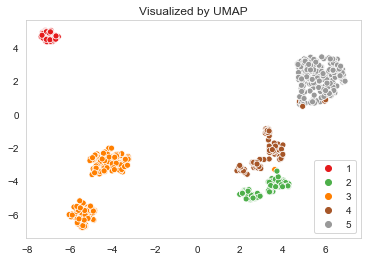

In [4]:
#all_y_km
#vis_tsne(X, y_km) 
vis_umap(X_train, y_km_train)

<IPython.core.display.Javascript object>


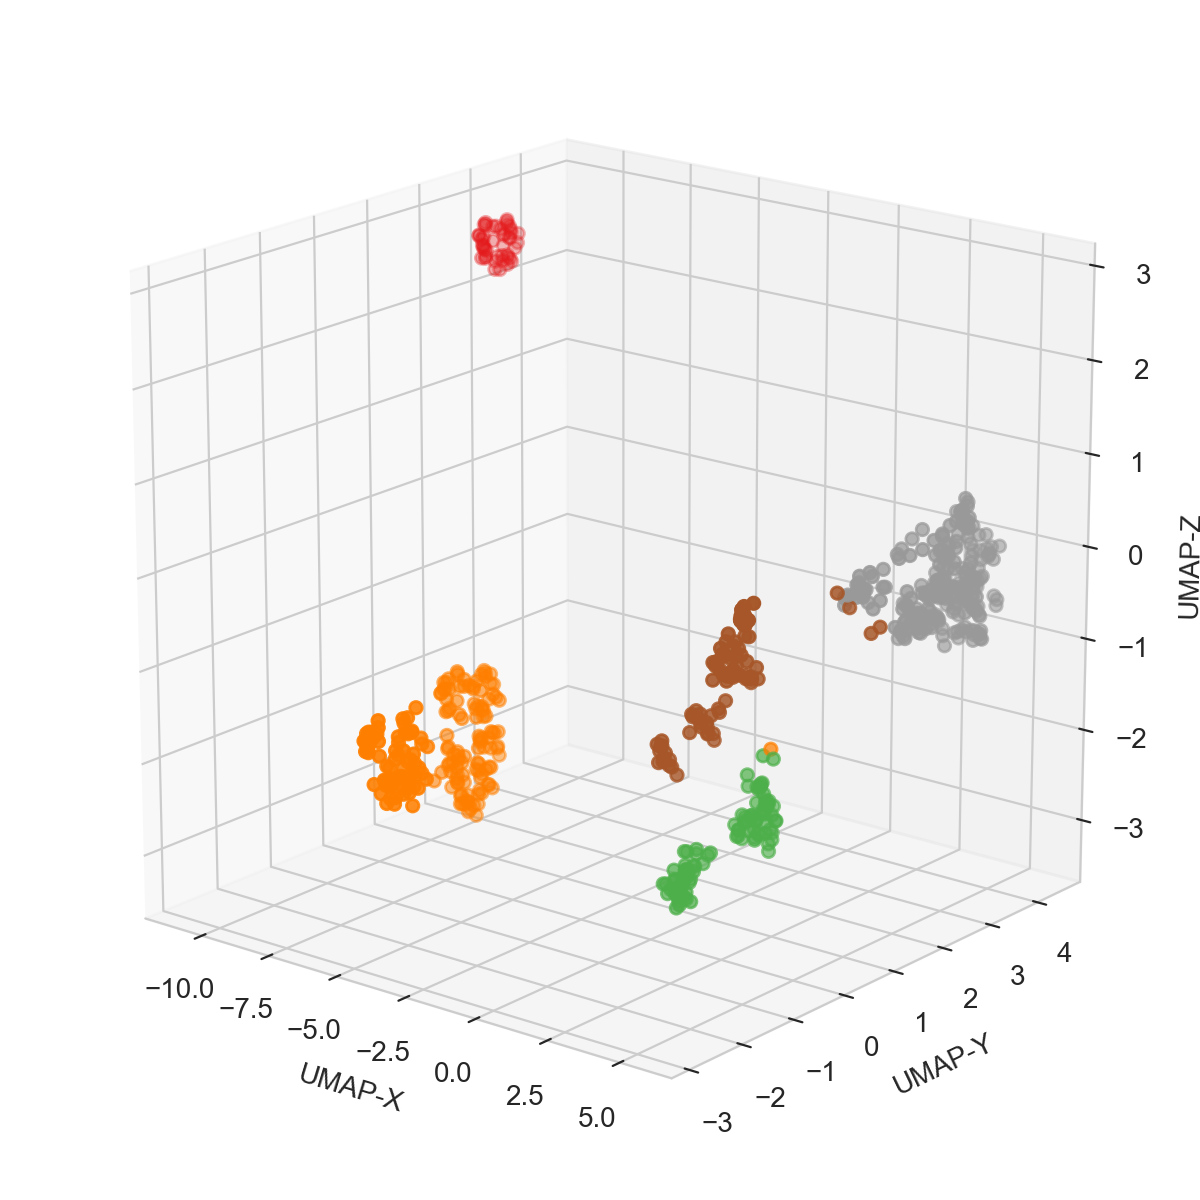

<IPython.core.display.Javascript object>


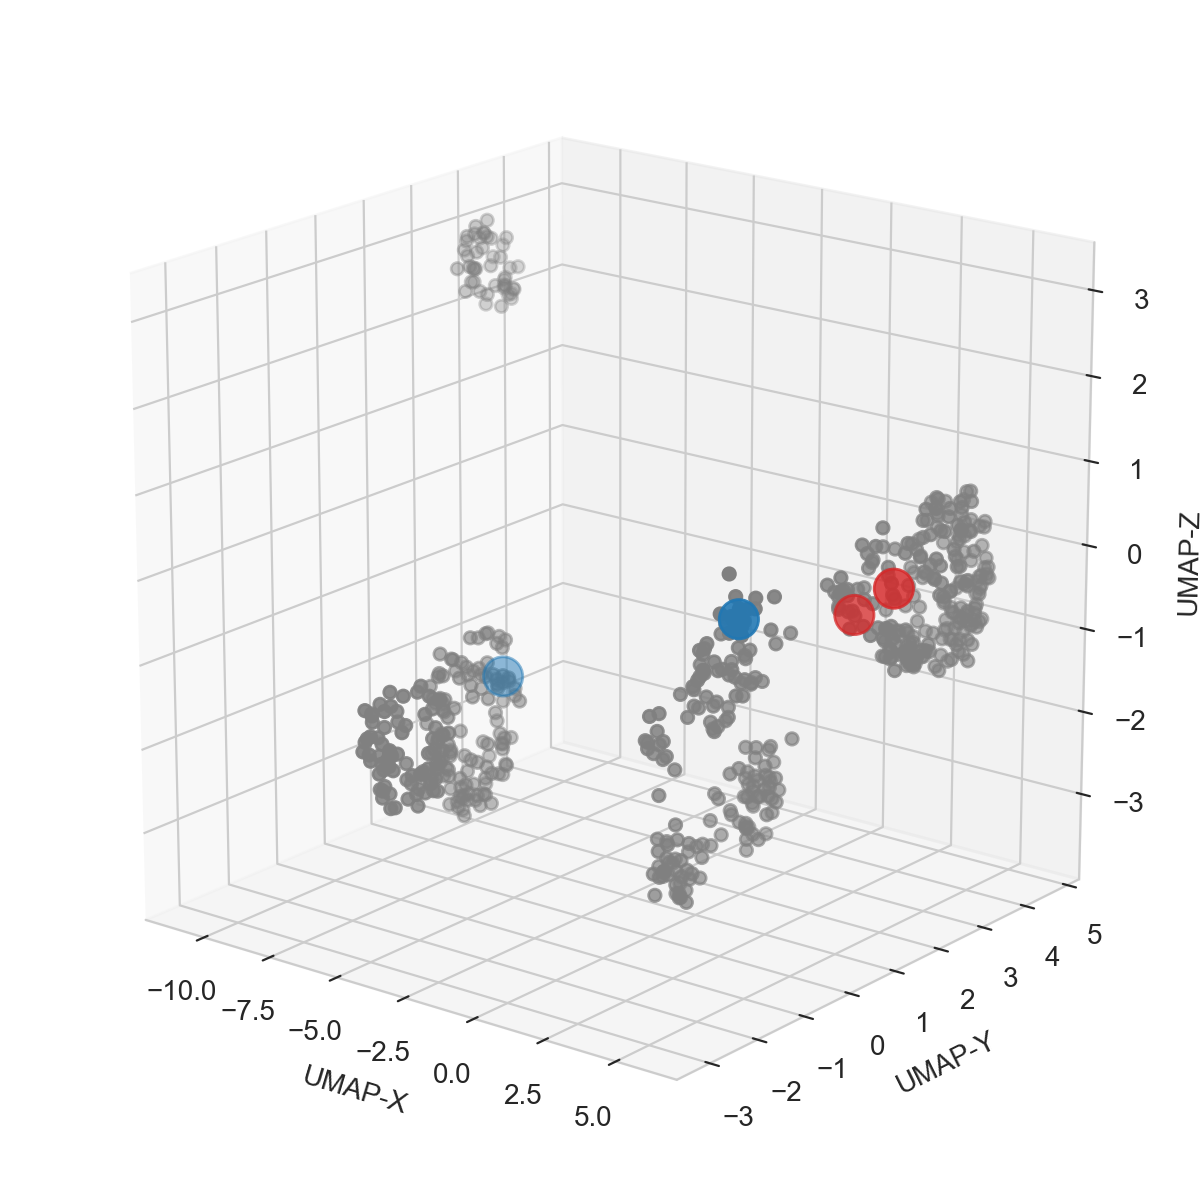

In [5]:
%matplotlib notebook
#heat = np.random.normal(0, 0.2, np.shape(X)[0])
#d3_tsne(X, y_km)
reducer = d3_umap(X_train, y_km_train)
new_d3_umap(X_all, all_y_km, reducer)

In [6]:
#print(y_km)
np.save("new_kmeans_membership_%dclusters.npy"%optimal_num, all_y_km)
# cluster membership distribution
"""
num_bins = 50
n, bins, patches = plt.hist(y_km, num_bins, facecolor='blue', alpha=0.5)
plt.title("membership distribution")
plt.show()
"""

'\nnum_bins = 50\nn, bins, patches = plt.hist(y_km, num_bins, facecolor=\'blue\', alpha=0.5)\nplt.title("membership distribution")\nplt.show()\n'

In [7]:
#np.where(y_km==2)[0]
#print(y_km)